In [1]:
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from model import Net
from torchvision import transforms

sys.path.insert(0, '../..')
from load import load
from train import train, eval
from utils import plot_learningcurve, get_metrics
from dataset import psf_dataset, splitDataLoader, ToTensor, Normalize

In [2]:
model = Net()

# GPU support
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)
    model.to(device)

In [3]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

In [4]:
# Data set
data_dir = '../../dataset/'
dataset_size = 10000
dataset = psf_dataset(
                      root_dir = data_dir,
                      size = dataset_size,
                      transform = transforms.Compose([Normalize(data_dir),ToTensor()])
                     )

In [5]:
train(
      model, 
      dataset, 
      optimizer, 
      criterion,
      split = [0.9, 0.1],
      batch_size = 128,
      n_epoch = 200,
      random_seed = 42,
      model_dir = './',
      visdom = True  
     )

Training started on cuda:0
Visdom successfully connected to server
[1/200] Train loss: 18818.149675 
[1/200] Validation loss: 16632.719482 
[1/200] Time: 11.543002 s
------------------------------
[2/200] Train loss: 12296.957513 
[2/200] Validation loss: 11160.215210 
[2/200] Time: 8.650280 s
------------------------------
[3/200] Train loss: 9519.432425 
[3/200] Validation loss: 8421.794922 
[3/200] Time: 7.803327 s
------------------------------
[4/200] Train loss: 5919.498638 
[4/200] Validation loss: 4806.653870 
[4/200] Time: 7.535699 s
------------------------------
[5/200] Train loss: 3547.515095 
[5/200] Validation loss: 2910.235870 
[5/200] Time: 8.802023 s
------------------------------
[6/200] Train loss: 2264.940108 
[6/200] Validation loss: 2942.297211 
[6/200] Time: 9.300612 s
------------------------------
[7/200] Train loss: 1632.077162 
[7/200] Validation loss: 1832.619247 
[7/200] Time: 9.969396 s
------------------------------
[8/200] Train loss: 1300.424702 
[8/200

[64/200] Time: 9.332796 s
------------------------------
[65/200] Train loss: 103.613246 
[65/200] Validation loss: 445.130352 
[65/200] Time: 9.845121 s
------------------------------
[66/200] Train loss: 88.115346 
[66/200] Validation loss: 294.277470 
[66/200] Time: 9.207838 s
------------------------------
[67/200] Train loss: 87.018638 
[67/200] Validation loss: 353.664028 
[67/200] Time: 8.187663 s
------------------------------
[68/200] Train loss: 91.301551 
[68/200] Validation loss: 439.717907 
[68/200] Time: 8.756273 s
------------------------------
[69/200] Train loss: 88.886170 
[69/200] Validation loss: 322.752567 
[69/200] Time: 9.718652 s
------------------------------
[70/200] Train loss: 88.315675 
[70/200] Validation loss: 391.858932 
[70/200] Time: 10.021575 s
------------------------------
[71/200] Train loss: 83.903295 
[71/200] Validation loss: 336.622658 
[71/200] Time: 9.615085 s
------------------------------
[72/200] Train loss: 93.132243 
[72/200] Validation 

KeyboardInterrupt: 

  File "/mnt/diskss/povanberg/miniconda3/envs/pytorch/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/mnt/diskss/povanberg/miniconda3/envs/pytorch/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
IndexError: list index out of range
  File "/mnt/diskss/povanberg/miniconda3/envs/pytorch/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)


<Figure size 432x288 with 0 Axes>

Traceback (most recent call last):
  File "/mnt/diskss/povanberg/miniconda3/envs/pytorch/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)

During handling of the above exception, another exception occurred:

  File "/mnt/diskss/povanberg/miniconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/mnt/diskss/povanberg/miniconda3/envs/pytorch/lib/python3.7/site-packages/astropy/io/fits/hdu/hdulist.py", line 1031, in _try_while_unread_hdus
    return func(*args, **kwargs)
Traceback (most recent call last):
  File "/mnt/diskss/povanberg/miniconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/mnt/diskss/povanberg/miniconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.

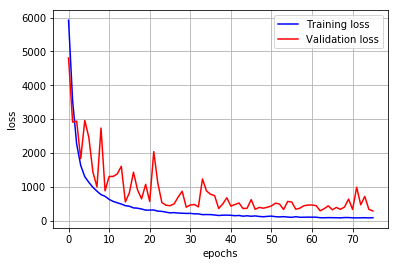

In [4]:
metrics = get_metrics()
plot_learningcurve(metrics, start=3)